In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [37]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [38]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [40]:
#Est ce que la table observations contient des valeurs manquantes ?
observations.count()

scientific_name    23296
park_name          23296
observations       23296
dtype: int64

In [41]:
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [47]:
#Rechercher les doublons dans la table observations
observations.duplicated().sum()

15

In [48]:
observations_duplicated = observations[observations.duplicated()== True]
observations_duplicated

,scientific_name,park_name,observations
7263,Echinochloa crus-galli,Great Smoky Mountains National Park,62
8710,Streptopelia decaocto,Yellowstone National Park,255
10038,Plantago major,Great Smoky Mountains National Park,90
10674,Arctium minus,Yosemite National Park,162
12381,Eleocharis palustris,Great Smoky Mountains National Park,62
13372,Hesperis matronalis,Bryce National Park,124
16741,Prunella vulgaris,Great Smoky Mountains National Park,75
17378,Potentilla norvegica,Yosemite National Park,148
17577,Spilogale putorius,Yellowstone National Park,256
18141,Poa compressa,Great Smoky Mountains National Park,80


In [49]:
#Supprimer les doublons dans la table observations
observations.drop_duplicates(inplace = True)

In [58]:
observations.duplicated().sum()

0

In [39]:
#Decouvrir la table species
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [42]:
#Est ce que la table species contient des valeurs manquantes ?
species.count()

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

In [43]:
#pourcentage des valeurs manquantes pour chaque variable dans la table species
round((1- species.count()/len(species))*100)

category                0.0
scientific_name         0.0
common_names            0.0
conservation_status    97.0
dtype: float64

In [44]:
#Remplacer les valeurs manquantes dans la colonne conservation_status de la table species
species.conservation_status.fillna('No Intervention', inplace = True)

C:\Users\elbou\AppData\Local\Temp\ipykernel_2800\682960567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  species.conservation_status.fillna('No Intervention', inplace = True)


In [45]:
species.isnull().sum()

category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64

In [46]:
#Rechercher les doublons dans la table species
species.duplicated().sum()

0

In [60]:
#Créer une colonne booléenne is_protected pour la table species
#pd.set_option('display.max_rows', None)
species['is_protected'] = species.conservation_status != 'No Intervention'

In [61]:
#Lister toutes les catégories d’espèces
species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [70]:
#compter le nombre d'espèce par categorie
species_catgories = species.groupby('category').size().reset_index(name= 'nombre_total')
species_catgories

,category,nombre_total
0,Amphibian,80
1,Bird,521
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
5,Reptile,79
6,Vascular Plant,4470


In [78]:
#Compter le nombre d'espèce protegés par catégorie
proteged_species = species[species.is_protected == True].groupby('category').size().reset_index(name = 'total_protected')
proteged_species

,category,total_protected
0,Amphibian,7
1,Bird,79
2,Fish,11
3,Mammal,38
4,Nonvascular Plant,5
5,Reptile,5
6,Vascular Plant,46


In [113]:
#Creer un tableau croisé qui donne les proportions des espèces protegés
is_protected_table = pd.pivot_table(data= species, index= 'category', columns= 'is_protected', values = 'scientific_name', aggfunc= 'count').reset_index()
is_protected_table

is_protected,category,False,True
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [114]:
is_protected_table['proportion_protected'] = round (100 * is_protected_table[True] / (is_protected_table[True]+is_protected_table[False]))
is_protected_table

is_protected,category,False,True,proportion_protected
0,Amphibian,73,7,9.0
1,Bird,442,79,15.0
2,Fish,116,11,9.0
3,Mammal,176,38,18.0
4,Nonvascular Plant,328,5,2.0
5,Reptile,74,5,6.0
6,Vascular Plant,4424,46,1.0


In [115]:
is_protected_table = is_protected_table.sort_values(by='proportion_protected', ascending=False)
is_protected_table

is_protected,category,False,True,proportion_protected
3,Mammal,176,38,18.0
1,Bird,442,79,15.0
0,Amphibian,73,7,9.0
2,Fish,116,11,9.0
5,Reptile,74,5,6.0
4,Nonvascular Plant,328,5,2.0
6,Vascular Plant,4424,46,1.0


C:\Users\elbou\AppData\Local\Temp\ipykernel_2800\1389996357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= is_protected_table, x= 'category', y= 'proportion_protected', palette = 'colorblind')


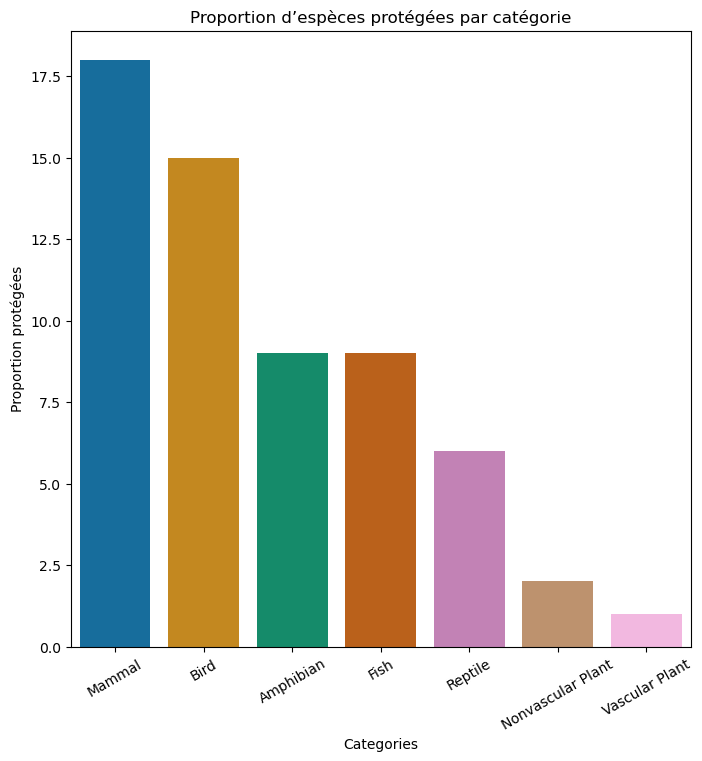

In [123]:
# Visualisation Proportion d’espèces protégées par catégorie
plt.figure(figsize= (8,8))
sns.barplot(data= is_protected_table, x= 'category', y= 'proportion_protected', palette = 'colorblind')
plt.xlabel('Categories')
plt.ylabel('Proportion protégées')
plt.title('Proportion d’espèces protégées par catégorie')
plt.xticks( rotation= 30)
plt.show()

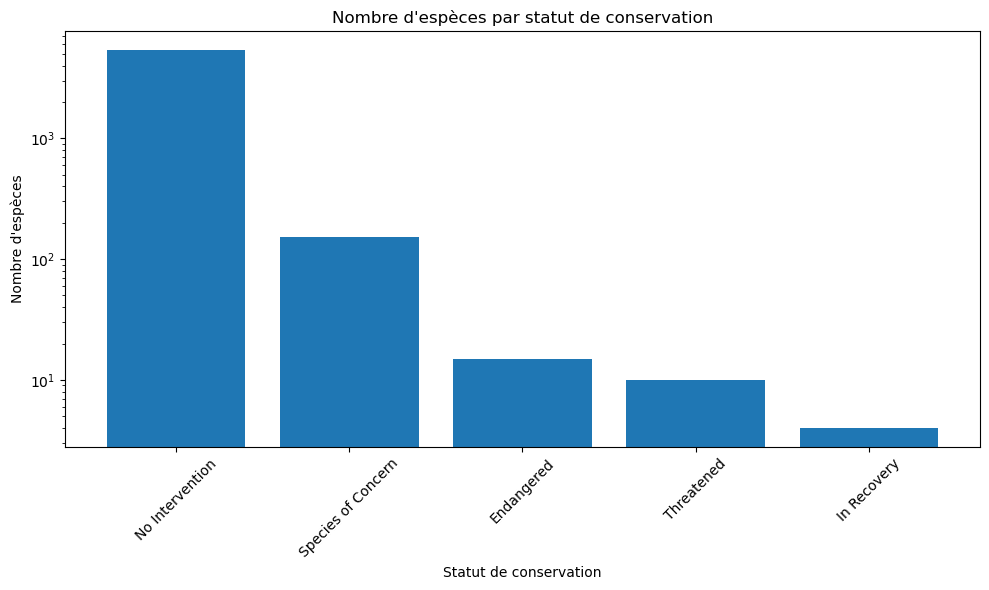

In [132]:
#Visualisation du statuts de conservation
# Compter le nombre d'espèces uniques par statut
status_counts = species.groupby('conservation_status')['scientific_name'].nunique().sort_values(ascending=False)

# Tracer l’histogramme
plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values)
plt.xlabel('Statut de conservation')
plt.ylabel('Nombre d\'espèces')
plt.title('Nombre d\'espèces par statut de conservation')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()